In [13]:
# --- 无监督学习：葡萄酒聚类 ---

# 1. 导入工具
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # 数据标准化工具
import os
# 设置环境变量以避免内存泄漏警告
os.environ["OMP_NUM_THREADS"] = "1"

# 2. 加载和准备数据
# 讲解：这次我们从csv文件读取数据。葡萄酒数据有很多化学成分特征。
wine_df = pd.read_csv('wine_data.csv')
# 讲解：聚类前，通常需要选择用于聚类的特征

In [15]:
wine_df

# 选择感兴趣的特征：酒精含量、色度、酒精多酚等
#X = data[['Alcohol', 'Color_intensity', 'Flavanoids']]
X_wine=wine_df[['a', 'b']]

In [17]:
# 3. 数据标准化 (非常重要！)
# 讲解：KMeans是基于距离的算法。如果两个特征的数值范围（量纲）差距很大，
# 比如一个范围是0-10，另一个是1000-5000，那么距离的计算就会被后者主导。
# 标准化就是把所有特征都缩放到一个相似的范围，消除量纲影响，让每个特征都同等重要。
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
print("标准化后的数据前5行:\n", X_wine_scaled[:5])

标准化后的数据前5行:
 [[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]]


# 4. 使用肘部法则寻找最佳K值

D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

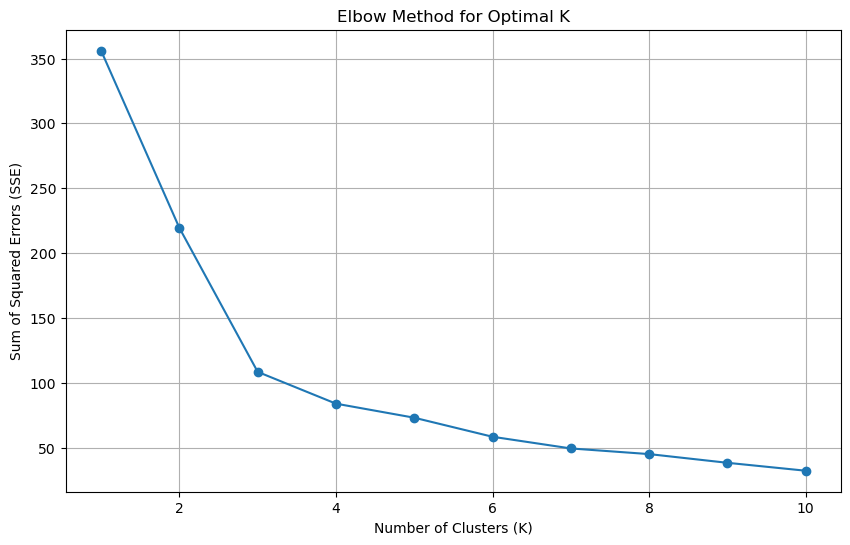

In [19]:
# 创建一个空列表sse，用于存储不同K值下聚类的总误差（Sum of Squared Errors）
sse = []
# 使用for循环，测试K值从1到10的情况
for k in range(1, 11):
    # 针对当前的K值，创建一个KMeans模型实例
    # n_clusters=k: 设置簇的数量
    # random_state=42: 设置随机种子，保证每次运行结果一致，便于复现
    # n_init='auto': 让scikit-learn自动选择初始化质心的方法
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # 使用标准化后的数据来训练（拟合）KMeans模型
    kmeans.fit(X_wine_scaled)
    # 将当前K值下计算出的总误差（保存在模型的inertia_属性中）添加到sse列表里
    sse.append(kmeans.inertia_)

# 绘图，可视化肘部法则的结果
# 创建一个新的图形，设置大小为10x6英寸
plt.figure(figsize=(10, 6))
# 绘制折线图，x轴是K值（1到10），y轴是对应的总误差sse，marker='o'表示在每个数据点画一个圆圈
plt.plot(range(1, 11), sse, marker='o')
# 设置图表的标题
plt.title('Elbow Method for Optimal K')
# 设置x轴的标签
plt.xlabel('Number of Clusters (K)')
# 设置y轴的标签
plt.ylabel('Sum of Squared Errors (SSE)')
# 显示网格线，方便观察
plt.grid(True)
# 将图表显示出来
plt.show()
# 讲解：引导学生观察图像，可以清晰地看到在K=3时，出现了一个明显的“肘点”。

# 5. 使用最佳K值进行聚类

In [21]:
# 根据肘部法则的观察，我们选择最佳的K值为3
optimal_k = 3
# 再次创建一个KMeans模型，这次直接使用最佳的簇数
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# 调用fit_predict方法，对数据进行聚类，并返回每个数据点所属的簇标签（0, 1, 或 2）
# 然后，在原始的wine_df DataFrame中创建一个新列'Cluster'来存储这些标签
wine_df['Cluster'] = kmeans.fit_predict(X_wine_scaled)
# 打印带有聚类结果的前5行数据
print("\n聚类结果预览:\n", wine_df.head())


聚类结果预览:
    type      a     b     c     d    e     f     g     h     i     j     k  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04   

      l     m  Cluster  
0  3.92  1065        2  
1  3.40  1050        2  
2  3.17  1185        2  
3  3.45  1480        2  
4  2.93   735        2  


D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 6. 可视化聚类结果

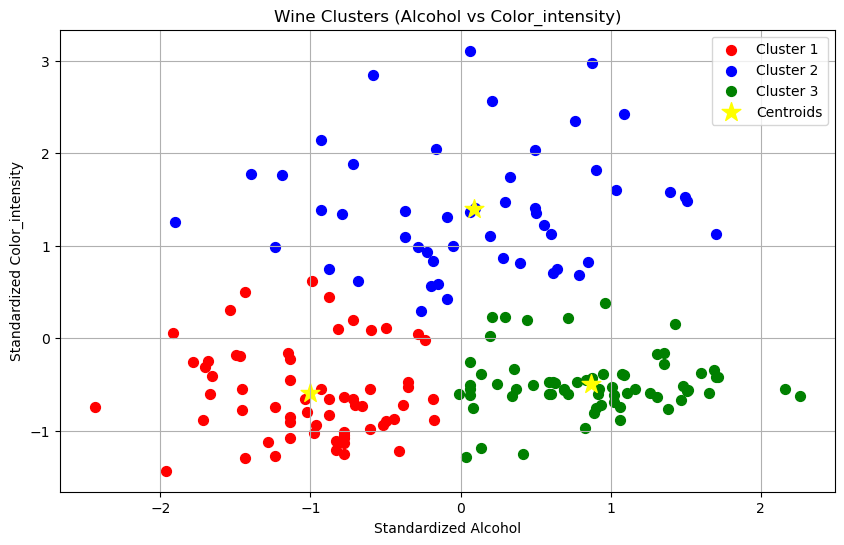

In [28]:

# 创建一个新的图形
plt.figure(figsize=(10, 6))
# 讲解：我们用不同的颜色来画出不同的簇
# 绘制第一个簇（标签为0）的散点图
# X_wine_scaled[wine_df['Cluster'] == 0, 0] 解释:
# 1. wine_df['Cluster'] == 0: 这是一个条件判断，会返回一个布尔序列（True/False）。
#    如果某行的'Cluster'列是0，则对应位置为True，否则为False。
# 2. X_wine_scaled[...]: 这是布尔索引。它会选取X_wine_scaled中，所有对应布尔序列为True的行。
#    也就是所有被聚类为第0簇的数据行。
# 3. ..., 0]: 在选出的所有第0簇的行中，选取索引为0的列（即标准化后的'Alcohol'），作为x坐标。
# X_wine_scaled[wine_df['Cluster'] == 0, 1] 解释:
#    同理，选取所有第0簇的行中，索引为1的列（即标准化后的'Malic_Acid'），作为y坐标。
# s=50: 点的大小, c='red': 颜色, label='Cluster 1': 图例标签
plt.scatter(X_wine_scaled[wine_df['Cluster'] == 0, 0], X_wine_scaled[wine_df['Cluster'] == 0, 1], s=50, c='red', label='Cluster 1')
# 绘制第二个簇（标签为1）的散点图，逻辑同上
plt.scatter(X_wine_scaled[wine_df['Cluster'] == 1, 0], X_wine_scaled[wine_df['Cluster'] == 1, 1], s=50, c='blue', label='Cluster 2')
# 绘制第三个簇（标签为2）的散点图，逻辑同上
plt.scatter(X_wine_scaled[wine_df['Cluster'] == 2, 0], X_wine_scaled[wine_df['Cluster'] == 2, 1], s=50, c='green', label='Cluster 3')

# 画出每个簇的中心点（质心）
# 从训练好的kmeans模型中，获取质心的坐标
centers = kmeans.cluster_centers_
# 绘制质心的散点图
# centers[:, 0]: 选取所有质心行的第0列（x坐标）
# centers[:, 1]: 选取所有质心行的第1列（y坐标）
# s=200: 点的大小, c='yellow': 颜色, marker='*': 形状为星形
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', marker='*', label='Centroids')

# 设置图表的标题
plt.title('Wine Clusters (Alcohol vs Color_intensity)')
# 设置x轴的标签
plt.xlabel('Standardized Alcohol')
# 设置y轴的标签
plt.ylabel('Standardized Color_intensity')
# 显示图例
plt.legend()
# 显示网格线
plt.grid(True)
# 将最终的图表显示出来
plt.show()
